In [2]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, SpatialDropout1D, BatchNormalization
import wordcloud


In [19]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [20]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [22]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1)

In [23]:
positive = load_data(positive_file)
negative = load_data(negative_file)

#View the first 10 positive reviews and first 10 negative reviews
print(positive[0:10])
print("\n")
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']


['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [24]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))
print(type(data))

<class 'list'>


The mean review word size is : 4.3
The standard deviation is calculated to: 2.2


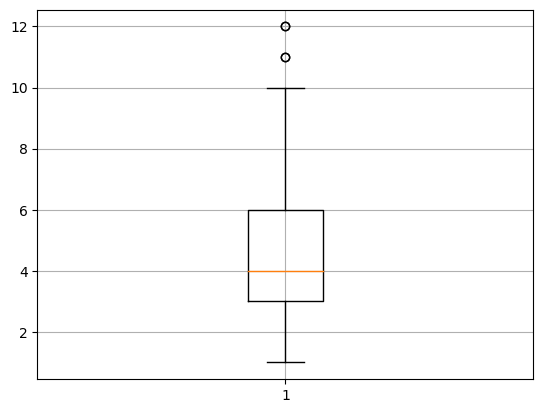

The number of unique words was calculated to be: 1676
WORD CLOUD DIAGRAM


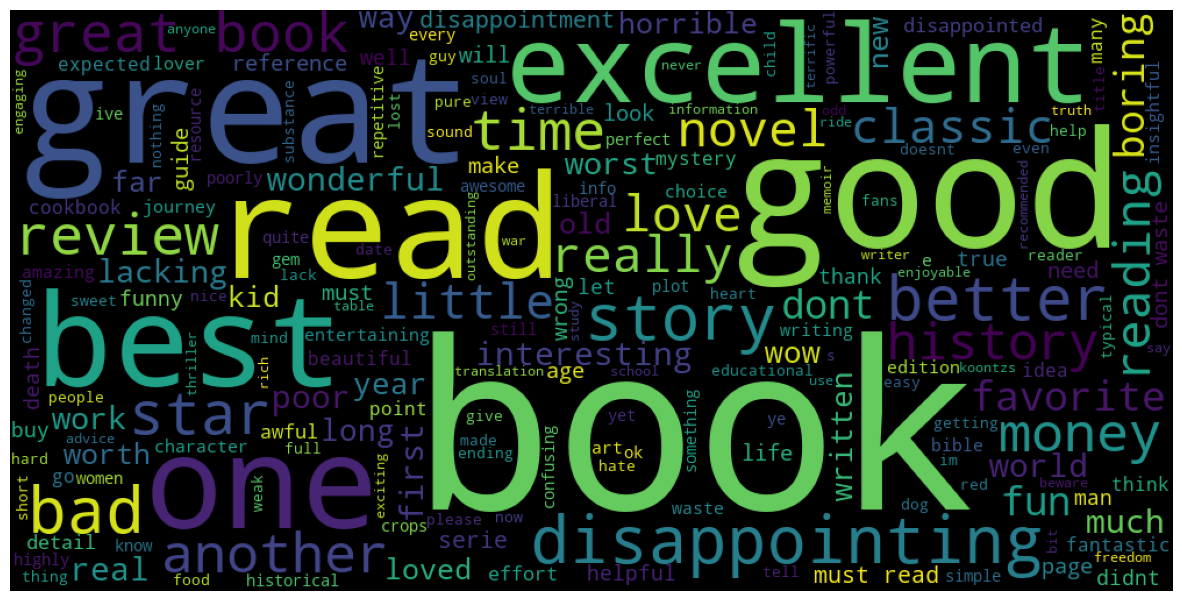

In [25]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

count_words = []
count = 0

for i in data:
    word_list = i.split()
    number_of_words = len(word_list)
    count_words.append(number_of_words)
    count += 1

#Adding the words together
add = sum(count_words)
avg = add/count
print('The mean review word size is : {:.1f}'.format(avg))

std = np.std(count_words)
print("The standard deviation is calculated to: {:.1f}".format(std))

plt.boxplot(count_words)
plt.grid()
plt.show()

# - Calculate the number of unique words in the dataset

# A set is a collection in which all elements are unique.
unique_words = set(data)

unique_word_count = len(unique_words)
# display the number of unique words 
print("The number of unique words was calculated to be: {}".format(unique_word_count))

# - Perform any other dataset investigation that you feel would be valuable

#plot a wordcloud of positive and negative book reviews  

from wordcloud import WordCloud 

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(data))
print("WORD CLOUD DIAGRAM")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()



### The word cloud above displays some of the most frequent words found in the dataset.

In [26]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])
#display the length of the tokenized data
print(len(tokenized_data))

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]
1793


# Pre-processing

In [27]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
# Put the padding at the end of the sequences

padded = pad_sequences(tokenized_data, maxlen = 4, padding = "post")

#display the first five padded sequence
print("Padded tokenized_data:\n {}".format(padded[ :5]))

Padded tokenized_data:
 [[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 [ 6  4  0  0]
 [ 1 12  3  0]]


In [28]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
y = labels
X = padded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)


In [29]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):
    
    # use the helper to_class function to convert
    # y_pred and y_test before supplying them to the sklearn functions.
    y_test = to_class(y_test)
    
    #Get the predictions for y_pred
    #makes a prediction for the test set given the model
    y_pred = model.predict(X_test)
       
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    #Evaluate precision_score
    print()
    print(precision_score(y_test, y_pred))
    #Display the recall_score
    print()
    print(recall_score(y_test, y_pred))
    #Display the f1_score
    print(f1_score(y_test, y_pred))

# Build and tune model

Define network architecture

In [30]:
# initializing an object from TensorFlow’s Sequential class
# Build the sequencial model of recurrent neural network (RNN)
model = Sequential()

# output_dim can be any value
# output_dim is defined as the number of dimensions we wish to embed into
#creating and adding the embedding layer
embedding_layer = Embedding(input_dim = 1794, output_dim = 32, input_length = 4)
model.add(embedding_layer)


# adding SpatialDropout1D(0.2) layer
model.add(SpatialDropout1D(0.2))

# BatchNormalization()
BatchNormalization()

# add an lstm layer of 32
model.add(LSTM(32))

# adding a dense layer
model.add(Dense(2, activation = 'softmax'))



## Train model
#### TRAIN AND TUNE THE MODEL

In [15]:
# Compiling our neural network
# The compilation step of building a neural network is where we specify the neural net’s optimizer and loss function.
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Fitting The Recurrent Neural Network On The Training Set
# Will specify epochs = 100 in this case.
# the size of batches (32) that the network will be trained in through each epoch.
# model.fit(X_train, y_train, output_dim = 10, epochs = 5, batch_size = 10)

# Defining the model

# function to determine the best output_dim
# creating an empty list
empty_list = []

lst = [10, 25, 50, 100]
for i in lst:
    
    # Initialize the classifier
    model = Sequential()
#     adding layers to the model
    embedding_layer = Embedding(input_dim = 1794, output_dim = i, input_length = 4)
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.3))
    BatchNormalization()
    model.add(LSTM(32))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    history = model.fit(X_train, y_train, epochs = 5, batch_size = 10, validation_steps = 30)
    model.summary()
    
    empty_list.append(model)
    

loss_value_model = empty_list[0] 

for model_loss in empty_list:
    
    if loss_value_model.loss > model_loss.loss:
        
        loss_value_model = model_loss
        

print("\n\n\n")        
loss_value_model.summary()    
    
    

    

Epoch 1/5
144/144 [==============================] - 3s 3ms/step - loss: 0.6929
Epoch 2/5
144/144 [==============================] - 0s 3ms/step - loss: 0.6783
Epoch 3/5
144/144 [==============================] - 0s 3ms/step - loss: 0.6506
Epoch 4/5
144/144 [==============================] - 0s 3ms/step - loss: 0.6479
Epoch 5/5
144/144 [==============================] - 0s 3ms/step - loss: 0.6447
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 10)             17940     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 4, 10)            0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 32)                5504      
                                                  

Examine performance of model

Plot graphs for accuracy and loss

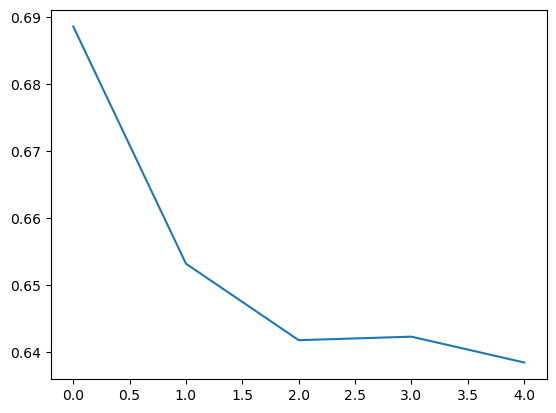

In [16]:
# Plot the loss_per_epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [16]:
# calling the assess_model function


In [17]:
#display the first 10 model predictions
predictins = model.predict(X_test)
predictins[0:10]

12/12 [==============================] - 1s 2ms/step


array([[0.02668979, 0.9733102 ],
       [0.9393084 , 0.06069168],
       [0.2839522 , 0.7160479 ],
       [0.03344309, 0.9665569 ],
       [0.4049697 , 0.59503025],
       [0.6886594 , 0.31134054],
       [0.53113294, 0.46886697],
       [0.2839522 , 0.7160479 ],
       [0.2839522 , 0.7160479 ],
       [0.60788053, 0.3921194 ]], dtype=float32)

# Make a prediction

In [31]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding = 'post', maxlen = 4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

#call filter_words function to load and preprocess data
#maxlen was changed to 4 

#display the predicted results of the model
print(to_word_label(padded))


['negative', 'positive', 'negative', 'positive', 'positive']
